## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.datasets import cifar10
from resnet_builder import resnet # 這是從 resnet_builder.py 中直接 import 撰寫好的 resnet 函數
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True)
datagen.fit(x_train)

In [10]:
img_rows, img_cols, channels = 32, 32, 3
input_shape = (img_rows, img_cols, channels)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [14]:
# model = resnet(input_shape = input_shape)

# opt = Adam(lr=0.001, decay = 0, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-8)
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

# model.summary()

In [15]:
# model.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
#                     steps_per_epoch = len(x_train)/128, epochs = 100, validation_data = (x_test, y_test))

In [20]:
reg2=None
num_filters2=32
ac2='relu'
adm2=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.5
drop_conv2=0

model2 = Sequential()

model2.add(Conv2D(num_filters2, (3, 3), activation=ac2, kernel_regularizer=reg2, input_shape=(img_rows, img_cols, channels),padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Flatten())
model2.add(Dense(512, activation=ac2,kernel_regularizer=reg2))
model2.add(BatchNormalization())
model2.add(Dropout(drop_dense2))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)

In [21]:
history2=model2.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
391/390 [==============================] - 379s 969ms/step - loss: 1.7864 - accuracy: 0.4066 - val_loss: 1.4656 - val_accuracy: 0.4914
Epoch 2/100
391/390 [==============================] - 367s 940ms/step - loss: 1.3135 - accuracy: 0.5435 - val_loss: 1.6747 - val_accuracy: 0.5063
Epoch 3/100
391/390 [==============================] - 354s 907ms/step - loss: 1.1081 - accuracy: 0.6108 - val_loss: 0.9614 - val_accuracy: 0.6577
Epoch 4/100
391/390 [==============================] - 381s 975ms/step - loss: 0.9619 - accuracy: 0.6610 - val_loss: 1.4486 - val_accuracy: 0.5680
Epoch 5/100
391/390 [==============================] - 377s 963ms/step - loss: 0.8724 - accuracy: 0.6950 - val_loss: 0.8035 - val_accuracy: 0.7342
Epoch 6/100
391/390 [==============================] - 415s 1s/step - loss: 0.7995 - accuracy: 0.7203 - val_loss: 0.8876 - val_accuracy: 0.7107
Epoch 7/100
391/390 [==============================] - 369s 944ms/step - loss: 0.7503 - accuracy: 0.7389 - val_loss: 0.88

391/390 [==============================] - 342s 874ms/step - loss: 0.2913 - accuracy: 0.8990 - val_loss: 0.4417 - val_accuracy: 0.8632
Epoch 57/100
391/390 [==============================] - 342s 875ms/step - loss: 0.2873 - accuracy: 0.8990 - val_loss: 0.4511 - val_accuracy: 0.8644
Epoch 58/100
391/390 [==============================] - 342s 874ms/step - loss: 0.2818 - accuracy: 0.9017 - val_loss: 0.4156 - val_accuracy: 0.8709
Epoch 59/100
391/390 [==============================] - 343s 877ms/step - loss: 0.2781 - accuracy: 0.9042 - val_loss: 0.4321 - val_accuracy: 0.8614
Epoch 60/100
391/390 [==============================] - 343s 878ms/step - loss: 0.2830 - accuracy: 0.9013 - val_loss: 0.5185 - val_accuracy: 0.8442
Epoch 61/100
391/390 [==============================] - 344s 879ms/step - loss: 0.2814 - accuracy: 0.9027 - val_loss: 0.4191 - val_accuracy: 0.8669
Epoch 62/100
391/390 [==============================] - 342s 876ms/step - loss: 0.2725 - accuracy: 0.9059 - val_loss: 0.4224 

In [23]:
train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]
train_acc = model2.history.history["accuracy"]
valid_acc = model2.history.history["val_accuracy"]


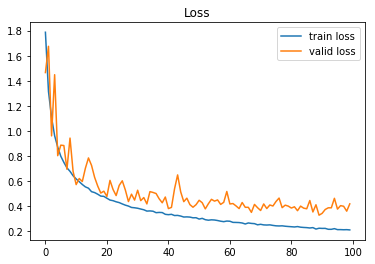

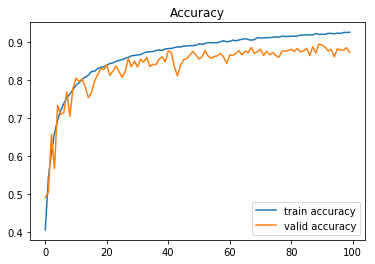

In [25]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()